## Importing libraries

In [256]:
# data analysis and wrangling libraries 
import pandas as pd
import numpy as np
import random as rnd

# visualization liberaries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Importing Datasets

In [257]:
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')
combine = [train_data, test_data]

# we combined the train and test data for cleaning the data together so that we dont need to do same for each seprately.

## Analyzing the data

In [258]:
# printing columan present in train data
print(train_data.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [259]:
train_data.index

RangeIndex(start=0, stop=891, step=1)

In [260]:
# preview the data
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [261]:
# checking data info

train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [262]:
# checking Duplicate values
train_data.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool>

In [263]:
# geting description fo data set
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [264]:
train_data.describe(include = 'O')
# it gives description of object datatype

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


## Analyze by pivoting featuers with survived

In [265]:
# analyses of Pclass with Survived 
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [266]:
# analysis of sex with Survived
train_data[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [267]:
# analysis of SibSp with Survived
train_data[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [268]:
# analysis of Parch With Survived
train_data[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## Analyze by visualizing data

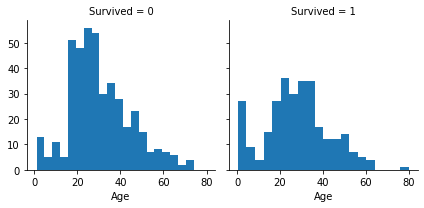

In [269]:
# Correlating numerical features with continous value

# we are using histogram because it is best for continous numerical featuers

# comparing age with Survived

g = sns.FacetGrid(train_data, col='Survived')
g.map(plt.hist, 'Age', bins=20)

from this we  observed that survivel of infants less than 4 years is higher

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


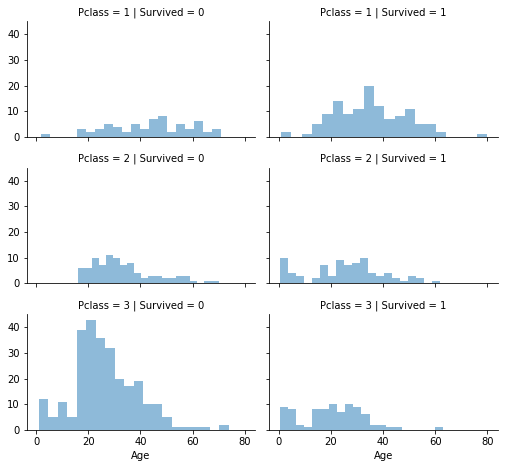

In [270]:
#  Correlating numerical and ordinal features 

# We can combine multiple features for identifying correlations using a single plot. 

# Comparing Age present in Pclass With Survived

grid = sns.FacetGrid(train_data, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

from this we observed PClass 3 has most of the passanger and also most of them has not survived

in Pclass 1 and 2 most of the infants has survived 

most no of passanger survived in Pclass 1

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


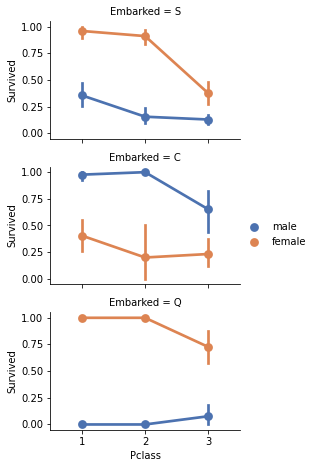

In [271]:
# Correlating Categorical Features

# now we will compare Embarked with Sex, Pclass and Survived to check correlation bw them

grid = sns.FacetGrid(train_data, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

From the observation we come to know that
1. Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports
2. Female passengers had much better survival rate than males.
3. Ports of embarkation have varying survival rates for Pclass=3 and among male passengers.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


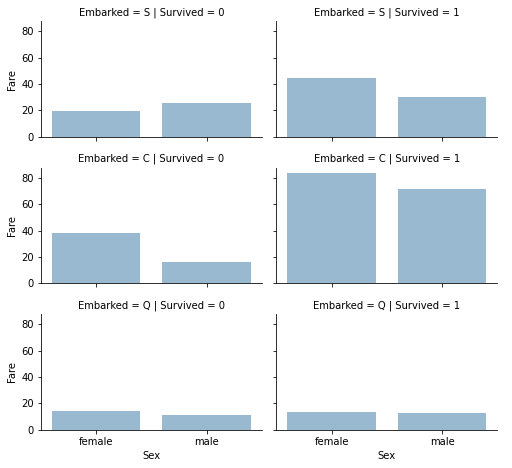

In [272]:
# Correlating categorical and numerical features

# here we will check correlation bw Embarked, Sex, Fare with Survived

grid = sns.FacetGrid(train_data, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

From the observation we come to know that
1. Higher fare paying passengers had better survival.
2. Port of embarkation correlates with survival rates

# Data Cleaning

### Droping Ticket and Cabin Features

In [273]:
# Droping useless Features

print("Before", train_data.shape, test_data.shape, combine[0].shape, combine[1].shape)

train_data = train_data.drop(['Ticket', 'Cabin'], axis=1)
test_data = test_data.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_data, test_data]

"After", train_data.shape, test_data.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

here we are droppping Ticket and Cabin because Ticket has no correlation on survived and Cabin has almost 75% of null values

### Creating new feature extracting from existing

In [274]:
# in this we are going to extract the title from the name column and adding it to new column Title

for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_data['Title'], train_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


1. In the following code we extract Title feature using regular expressions.
2. he RegEx pattern (\w+\.) matches the first word which ends with a dot character within Name feature.
3. he expand=False flag returns a DataFrame.
4. we used pd.crosstab to relate the title with the sex feature

In [275]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


1. In the following code we classified some of the title as rare.
2. we also solved the typos error by replace them with proper name and spelling.
3. we combined Title with Survived to check the correlation bw title and survived by using groupby function

### Converting the Data Type of Title

In [276]:
# we will be using ordinal encoder to change the datatype of Title because title is an ordinal data

from sklearn.preprocessing import OrdinalEncoder

ordinalencoder = OrdinalEncoder()

# Converting train data

ordinalencoder.fit(train_data[["Title"]])
train_data[["Title"]] = ordinalencoder.transform(train_data[["Title"]])

# as ordinalencoder will cange the datatype to float so we will be using astype function to convert float to int

train_data["Title"] = train_data["Title"].astype(int)
# converting test data

ordinalencoder.fit(test_data[["Title"]])
test_data[["Title"]] = ordinalencoder.transform(test_data[["Title"]])
test_data["Title"] = test_data["Title"].astype(int)

In [277]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,2


In [278]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
 10  Title        891 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 76.7+ KB


### Dropping Name and Passenger id from Train data and only name from Test data

In [279]:
train_data = train_data.drop(['Name', 'PassengerId'], axis=1)
test_data = test_data.drop(['Name'], axis=1)
combine = [train_data, test_data]
train_data.shape, test_data.shape

((891, 9), (418, 9))

### Converting Sex Datatype to int

In [280]:
# we will be using label encoder to convert sex into int because sex is a categorical data type

from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
train_data["Sex"]= labelencoder.fit_transform(train_data["Sex"])
test_data["Sex"]= labelencoder.fit_transform(test_data["Sex"])


In [281]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,S,2
1,1,1,0,38.0,1,0,71.2833,C,3
2,1,3,0,26.0,0,0,7.9250,S,1
3,1,1,0,35.0,1,0,53.1000,S,3
4,0,3,1,35.0,0,0,8.0500,S,2


### filling the nan values in age

In [282]:
# checking nan value in age

# for train data
count_nan = train_data["Age"].isnull().sum()
print('Number of NaN values present: ' + str(count_nan))

# for test data
count_nan = test_data["Age"].isnull().sum()
print('Number of NaN values present: ' + str(count_nan))

Number of NaN values present: 177
Number of NaN values present: 86


In [283]:
# filling the null value with mean 

# we will be using simpleimputer to fill the missing values

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# for Train data
imputer = imputer.fit(train_data[["Age"]])
train_data[["Age"]]= imputer.transform(train_data[["Age"]])

# for test data
imputer = imputer.fit(test_data[["Age"]])
test_data[["Age"]]= imputer.transform(test_data[["Age"]])


In [284]:
count_nan = train_data["Age"].isnull().sum()
print('Number of NaN values present: ' + str(count_nan))

count_nan = test_data["Age"].isnull().sum()
print('Number of NaN values present: ' + str(count_nan))

Number of NaN values present: 0
Number of NaN values present: 0


### converting age from float to int 

In [285]:
# converting age from float to int 

train_data["Age"] = train_data["Age"].astype(int)
test_data["Age"] = test_data["Age"].astype(int)

In [286]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    int64  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
 8   Title     891 non-null    int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 62.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    int64  
 4   SibSp        418 non-null    int64  
 5   P

In [287]:
# now we will create a new column age group and check its correlation with survived

train_data['AgeGroup'] = pd.cut(train_data['Age'], 5)
train_data[['AgeGroup', 'Survived']].groupby(['AgeGroup'], as_index=False).mean().sort_values(by='AgeGroup', ascending=True)

,AgeGroup,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.344762
2,"(32.0, 48.0]",0.403226
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


we did this to check which age group has the most survivel rate 

now we will change the age with ordinal based on there age group

In [288]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeGroup
0,0,3,1,1,1,0,7.2500,S,2,"(16.0, 32.0]"
1,1,1,0,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,0,1,0,0,7.9250,S,1,"(16.0, 32.0]"
3,1,1,0,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,1,2,0,0,8.0500,S,2,"(32.0, 48.0]"


now we can drop the agegroup column as its work has been done

In [289]:
train_data.Age.unique()

array([1, 2, 3, 0, 4])

In [290]:
train_data = train_data.drop(['AgeGroup'], axis=1)
combine = [train_data, test_data]
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,1,1,0,7.2500,S,2
1,1,1,0,2,1,0,71.2833,C,3
2,1,3,0,1,0,0,7.9250,S,1
3,1,1,0,2,1,0,53.1000,S,3
4,0,3,1,2,0,0,8.0500,S,2


# Feature Engineering

as we know that pclass and sibsp are related to family so we will be combining these columns to form a new column called FamilySize

In [291]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


now we will create new column for those who are IsAlone (FamilySize = 1)

In [292]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_data[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


now we can drop Parch, SibSp, and FamilySize features in favor of IsAlone.

In [293]:
train_data = train_data.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_data = test_data.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_data, test_data]

In [294]:
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,1,1,7.2500,S,2,0
1,1,1,0,2,71.2833,C,3,0
2,1,3,0,1,7.9250,S,1,1
3,1,1,0,2,53.1000,S,3,0
4,0,3,1,2,8.0500,S,2,1


In [295]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    int64  
 4   Fare      891 non-null    float64
 5   Embarked  889 non-null    object 
 6   Title     891 non-null    int64  
 7   IsAlone   891 non-null    int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 55.8+ KB


as we can see that embarked has 2 null value so we will replace the null value with most common value

In [296]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(dataset['Embarked'].mode()[0])

In [297]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    int64  
 4   Fare      891 non-null    float64
 5   Embarked  891 non-null    object 
 6   Title     891 non-null    int64  
 7   IsAlone   891 non-null    int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 55.8+ KB


In [298]:
train_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


now we will change the categorical feature of Embarked to numerical and for that we are going to use labelencoder

In [299]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
train_data["Embarked"]= labelencoder.fit_transform(train_data["Embarked"])
test_data["Embarked"]= labelencoder.fit_transform(test_data["Embarked"])

In [300]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    int64  
 4   Fare      891 non-null    float64
 5   Embarked  891 non-null    int64  
 6   Title     891 non-null    int64  
 7   IsAlone   891 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 55.8 KB


In [301]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    int64  
 4   Fare         417 non-null    float64
 5   Embarked     418 non-null    int64  
 6   Title        418 non-null    int64  
 7   IsAlone      418 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 26.2 KB


as we can see that fare in test data has 1 null value and also is of float data type. so now we will fill the null value and also convert the data type to int

In [302]:
# filling null value of fair in test data

test_data['Fare'].fillna(test_data['Fare'].dropna().median(), inplace=True)

In [303]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    int64  
 4   Fare         418 non-null    float64
 5   Embarked     418 non-null    int64  
 6   Title        418 non-null    int64  
 7   IsAlone      418 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 26.2 KB


now we will create a new column called FareGroup by Combining some  range of fair into 1 group

In [304]:
train_data['FareGroup'] = pd.qcut(train_data['Fare'], 4)
train_data[['FareGroup', 'Survived']].groupby(['FareGroup'], as_index=False).mean().sort_values(by='FareGroup', ascending=True)

,FareGroup,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


Now we will Convert the Fare feature to ordinal values based on the FareGroup.

In [305]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)



In [306]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Survived   891 non-null    int64   
 1   Pclass     891 non-null    int64   
 2   Sex        891 non-null    int64   
 3   Age        891 non-null    int64   
 4   Fare       891 non-null    int64   
 5   Embarked   891 non-null    int64   
 6   Title      891 non-null    int64   
 7   IsAlone    891 non-null    int64   
 8   FareGroup  891 non-null    category
dtypes: category(1), int64(8)
memory usage: 56.9 KB


now we will drop the FareGroup column as its work has been done

In [307]:
# dropping FareGroup column

train_data = train_data.drop(['FareGroup'], axis=1)
combine = [train_data, test_data]

In [308]:
train_data.head(50)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,1,1,0,2,2,0
1,1,1,0,2,3,0,3,0
2,1,3,0,1,1,2,1,1
3,1,1,0,2,3,2,3,0
4,0,3,1,2,1,2,2,1
5,0,3,1,1,1,1,2,1
6,0,1,1,3,3,2,2,1
7,0,3,1,0,2,2,0,0
8,1,3,0,1,1,2,3,0
9,1,2,0,0,2,0,3,0


In [309]:
test_data.head(50)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,1,2,0,1,2,1
1,893,3,0,2,0,2,3,0
2,894,2,1,3,1,1,2,1
3,895,3,1,1,1,2,2,1
4,896,3,0,1,1,2,3,0
5,897,3,1,0,1,2,2,1
6,898,3,0,1,0,1,1,1
7,899,2,1,1,2,2,2,0
8,900,3,0,1,0,0,3,1
9,901,3,1,1,2,2,2,0


Now we can say that our data is fully ready for model building

So now we will download the cleaned dataset and save it in a new cav file

In [310]:
train_data.to_csv('cleaned_train.csv')
test_data.to_csv('cleaned_test.csv')

# Model Building

For prediction we will be using Classification Algorithm as this is an Classification problem. we will be using algorithm like:-
1. Logistic Regression
2. KNN or k-Nearest Neighbors
3. Support Vector Machines
4. Naive Bayes classifier
5. Decision Tree
6. Random Forrest

### Splitting train and test

In [311]:
# we will be splitting the train and test data into X_train, Y_train, X_test

X_train = train_data.drop("Survived", axis=1)
Y_train = train_data["Survived"]
X_test  = test_data.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

### Logistic Regression

In [312]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

79.35

we got an accuracy of 79.35% form Logistic Regression

### KNN or k-Nearest Neighbors

In [314]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.18

we got an accuracy of 84.18% form KNN

### Support Vector Machines

In [317]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

82.72

we got an accuracy of 82.72 from SVM

### Naive Bayes classifier

In [318]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

75.98

we got an accuracy of 75.98 % from naive bayes classifier

### Decision Tree

In [319]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.87

we got an accuracy of 86.87 % from Decision Tree

### Random Forest

In [320]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.87

we got an accuracy of 86.87 % from Random Forest

# Model evaluation

In this section we will evaluate our models by compering there accuracy

In [321]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.87
5,Decision Tree,86.87
1,KNN,84.18
0,Support Vector Machines,82.72
2,Logistic Regression,79.35
4,Naive Bayes,75.98
